In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("data-2.csv")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
df["InvoiceDate"] = pd.to_datetime(df['InvoiceDate'])

In [4]:
df = df[df["UnitPrice"] > 0]
df = df[df["Quantity"] > 0]
df = df[df["Country"] != "Unspecified"]

df = df[(df["StockCode"].str.len() == 6) | (df["StockCode"].str.len() == 5) | (df["StockCode"].str.contains("gift"))]
df["GMV"] = df["Quantity"] * df["UnitPrice"]
# df.to_csv("new_data.csv")

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID,GMV
count,526927.000000,526927.000000,395802.000000,526927.000000
mean,10.572239,3.263847,15303.017845,19.452514
std,155.956328,4.381320,1709.665081,268.806495
min,1.000000,0.040000,12346.000000,0.060000
25%,1.000000,1.250000,13975.000000,3.750000
50%,3.000000,2.080000,15159.000000,9.900000
75%,11.000000,4.130000,16805.000000,17.400000
max,80995.000000,649.500000,18287.000000,168469.600000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526927 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    526927 non-null  object        
 1   StockCode    526927 non-null  object        
 2   Description  526927 non-null  object        
 3   Quantity     526927 non-null  int64         
 4   InvoiceDate  526927 non-null  datetime64[ns]
 5   UnitPrice    526927 non-null  float64       
 6   CustomerID   395802 non-null  float64       
 7   Country      526927 non-null  object        
 8   GMV          526927 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 40.2+ MB


In [7]:
gmv = df.groupby("StockCode").sum()
gmv = gmv.drop(columns=["CustomerID"])
gmv["GMV"] = gmv["Quantity"] * gmv["UnitPrice"]
gmv

,Quantity,UnitPrice,GMV
StockCode,,,
10002,860,77.15,66349.00
10080,303,9.04,2739.12
10120,193,6.30,1215.90
10123C,5,1.95,9.75
10124A,16,2.10,33.60
...,...,...,...
gift_0001_10,9,66.64,599.76
gift_0001_20,10,150.38,1503.80
gift_0001_30,7,175.53,1228.71


In [8]:
df_country = df.groupby("Country").sum()[["GMV"]]
df_country.sort_values("GMV", inplace=True)
df_country["GMV (%)"] = df_country["GMV"] / df_country["GMV"].sum() * 100
df_country

,GMV,GMV (%)
Country,,
Saudi Arabia,145.92,0.001424
Bahrain,754.14,0.007357
Czech Republic,786.74,0.007675
RSA,1002.31,0.009779
Brazil,1125.75,0.010983
European Community,1159.25,0.011310
Lithuania,1589.66,0.015509
Lebanon,1693.88,0.016526
United Arab Emirates,1864.78,0.018193


<AxesSubplot:xlabel='Country'>

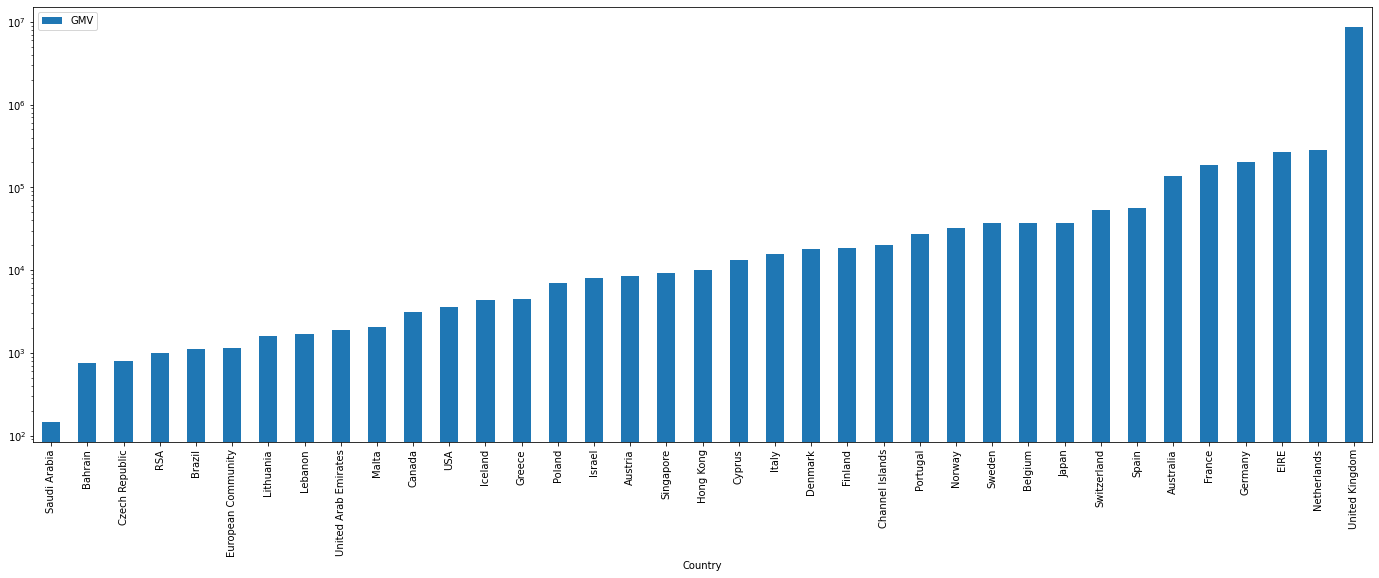

In [9]:
df_country.plot(kind="bar", y="GMV", figsize=(24, 8), logy=True)

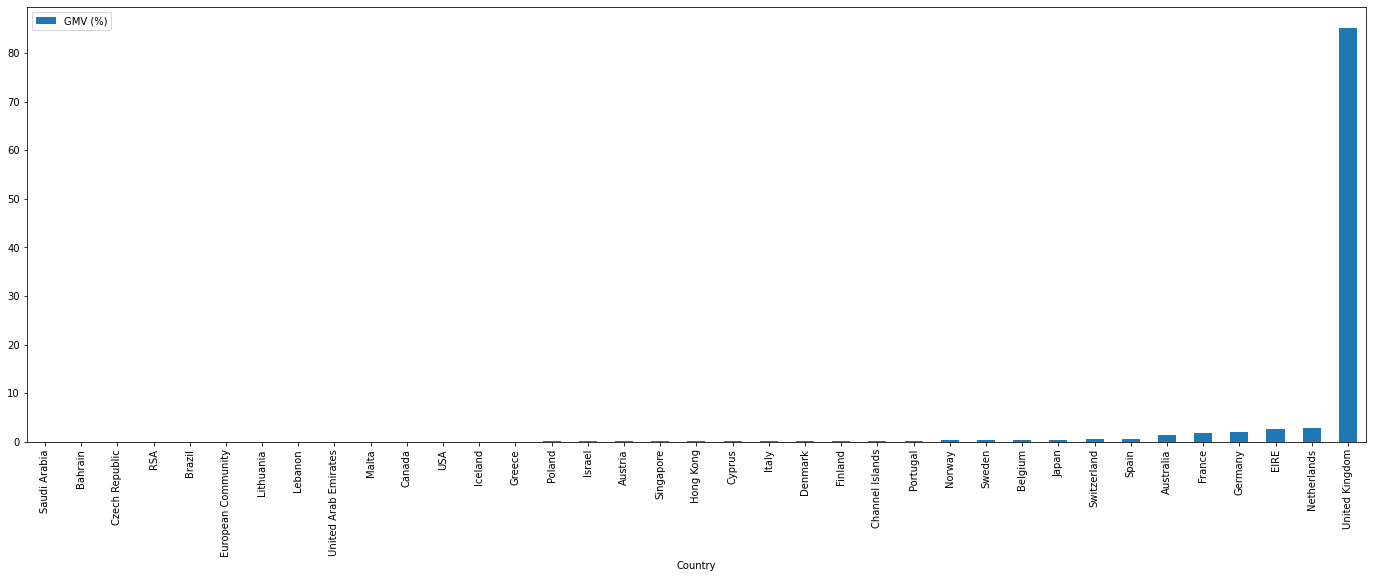

In [10]:
df_country.plot(kind="bar", y="GMV (%)", figsize=(24, 8));

C:\Users\dafaw\AppData\Local\Temp\ipykernel_6568\2049461555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_uk["GMV (%)"] = df_no_uk["GMV"] / df_no_uk["GMV"].sum() * 100


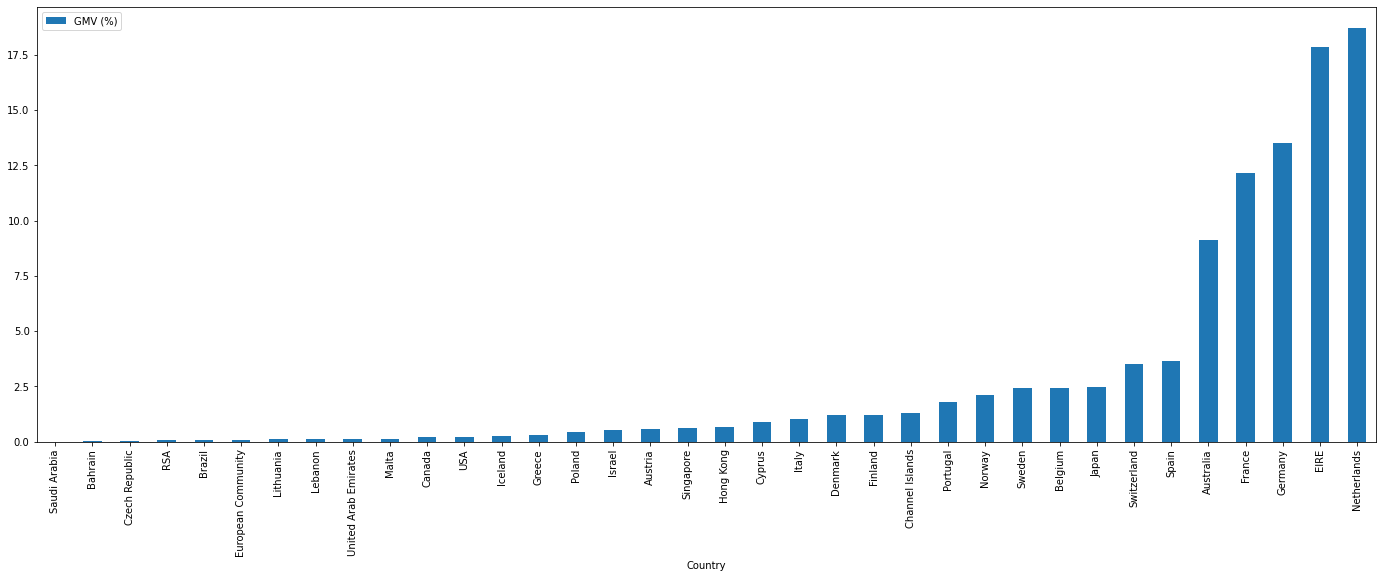

In [11]:
df_no_uk = df_country[df_country.index != "United Kingdom"]
df_no_uk["GMV (%)"] = df_no_uk["GMV"] / df_no_uk["GMV"].sum() * 100
df_no_uk.plot(kind="bar", y="GMV (%)", figsize=(24, 8));

In [12]:
items_per_country = df[["Country", "StockCode"]]
items_per_country = items_per_country.rename(columns={"StockCode": "Item"})
items_per_country = items_per_country.groupby("Country").count()
items_per_country = items_per_country.sort_values("Item", ascending=True)

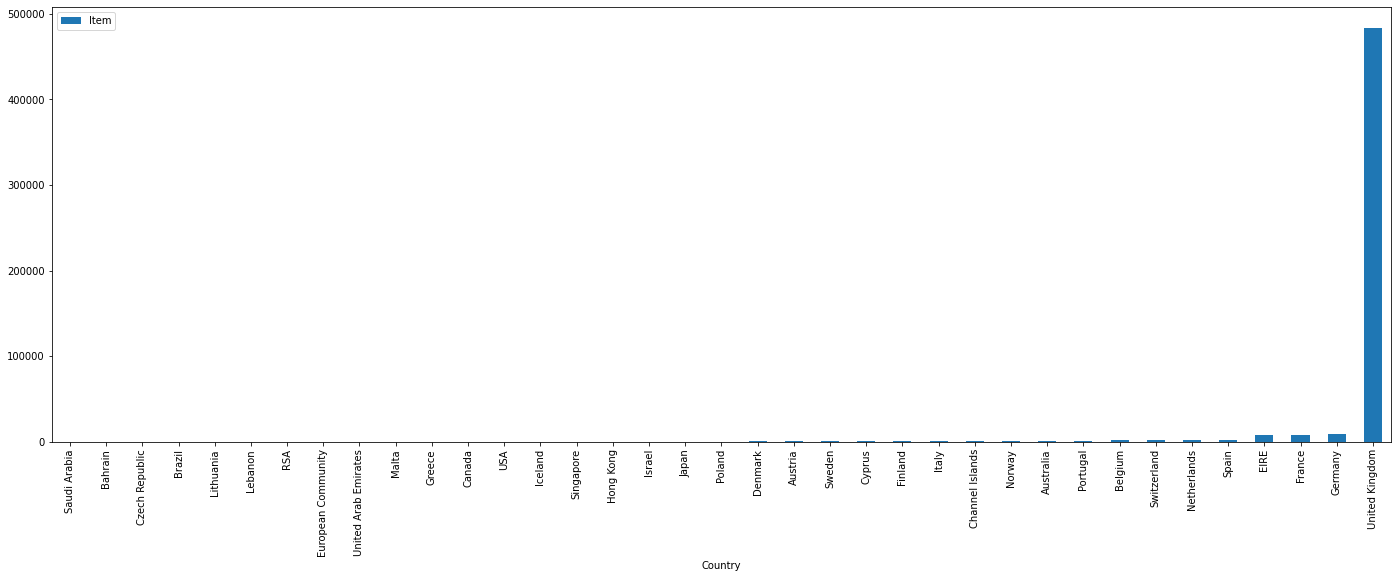

In [13]:
items_per_country.plot(kind="bar", y="Item", figsize=(24, 8));

<AxesSubplot:xlabel='Country'>

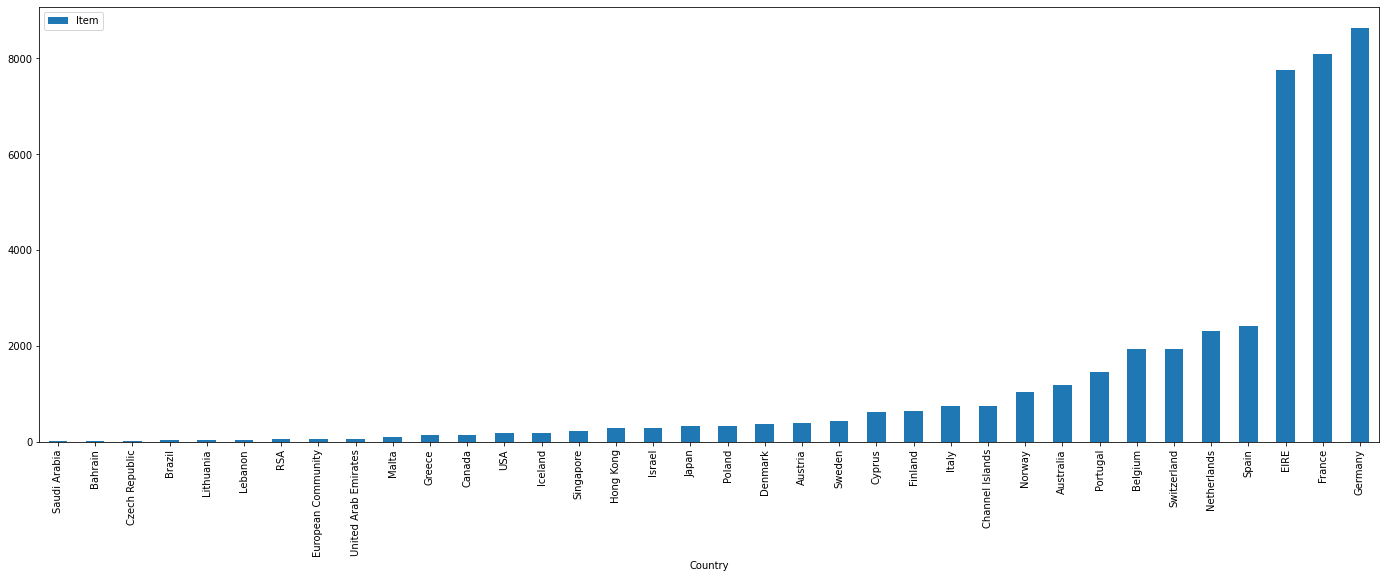

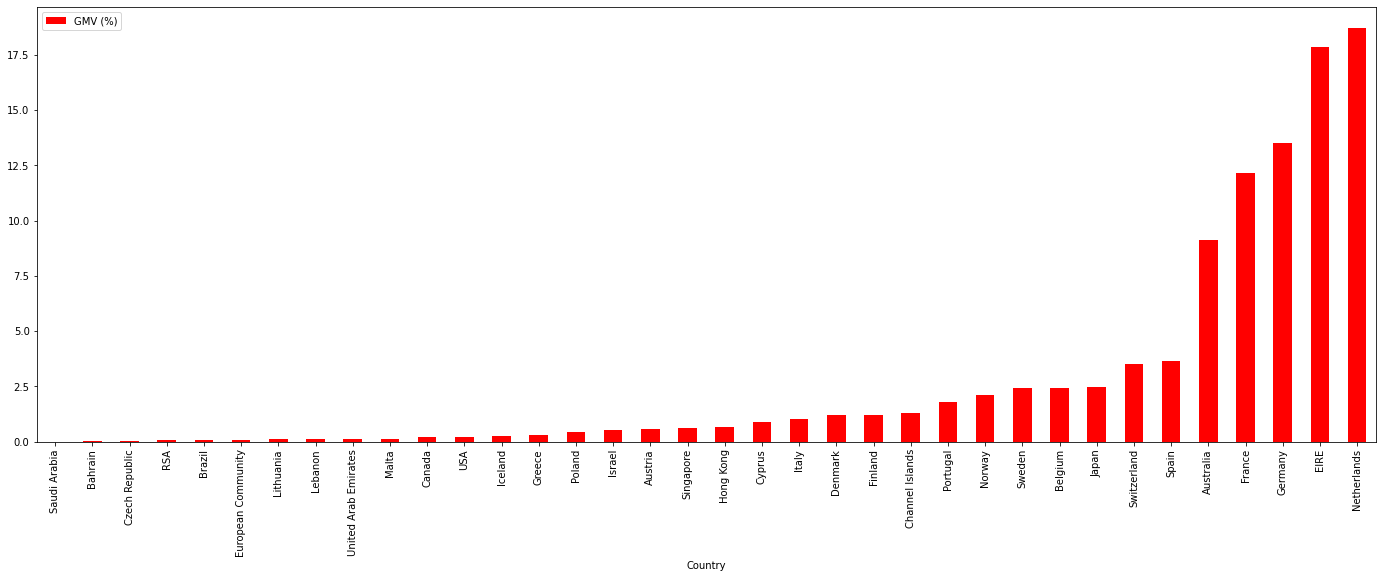

In [14]:
items_per_country[items_per_country.index != "United Kingdom"].plot(kind="bar", y="Item", figsize=(24, 8), stacked=True)
df_no_uk.plot(kind="bar", y="GMV (%)", figsize=(24, 8), color="red", stacked=True)